In [1]:
""""
Oi Pablo,

É o seguinte. 

1. Infelizmente, os dados estão divididos em treino e teste. Como isso é irrelevante para vc, comece juntando os pares de arquivos. Você terá então 6 arquivos ao todo, um para cada tópico.

2. Dentro de cada um, há uma mistura de posicionamentos contrários e favoráveis. Comece separando as duas coisas então, porque cada uma é uma semântica distinta. Vc terá assim 12 arquivos de novo (6 tópicos x 2 polaridades).

3. Alguns tópicos estão subrepresentados, e a Laís está tratando de expandir esses dados. Para efeito de teste, então, sugiro começar apenas pelos maiores, que são Sinovac, Cloroquina e Igreja, o que já são 6 estilos. Em breve os outros estarão prontos para uso também.

um abraço
"""
import pandas as pd


df_cloroquina = pd.concat([pd.read_csv('./data/original/cl_test.csv', sep=";"), pd.read_csv('./data/original/cl_train.csv', sep=";")])
df_igreja     = pd.concat([pd.read_csv('./data/original/igreja_test.csv', sep=";"), pd.read_csv('./data/original/igreja_train.csv', sep=";")])
df_cinovac    = pd.concat([pd.read_csv('./data/original/cino_test.csv', sep=";"), pd.read_csv('./data/original/cino_train.csv', sep=";")])
   

In [58]:

print("-----------------")
print(df_cloroquina["Polarity"].value_counts())
print(df_cloroquina["User_Name"].drop_duplicates().value_counts().sum())
print("-----------------")



print("-----------------")
print(df_igreja["Polarity"].value_counts())
print(df_igreja["User_Name"].drop_duplicates().value_counts().sum())
print("-----------------")



print("-----------------")
print(df_cinovac["Polarity"].value_counts())
print(df_cinovac["User_Name"].drop_duplicates().value_counts().sum())
print("-----------------")



-----------------
Polarity
against    1154
for        1141
Name: count, dtype: int64
2295
-----------------
-----------------
Polarity
against    1354
for        1041
Name: count, dtype: int64
2395
-----------------
-----------------
Polarity
for        1677
against    1416
Name: count, dtype: int64
3093
-----------------


In [2]:
"""Separate polarity"""

df_cloroquina_pos = df_cloroquina[df_cloroquina["Polarity"] == "for"]
df_cloroquina_neg = df_cloroquina[df_cloroquina["Polarity"] == "against"]

df_igreja_pos = df_igreja[df_igreja["Polarity"] == "for"]
df_igreja_neg = df_igreja[df_igreja["Polarity"] == "against"]

df_cinovac_pos = df_cinovac[df_cinovac["Polarity"] == "for"]
df_cinovac_neg = df_cinovac[df_cinovac["Polarity"] == "against"]

In [3]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Função principal para processar textos
def clusterizar_textos_com_labse(textos, num_clusters=5, random_state=42):
    # 1. Gerar embeddings com LaBSE
    modelo = SentenceTransformer('sentence-transformers/LaBSE')
    embeddings = modelo.encode(textos)

    # 2. Redução de dimensionalidade com t-SNE
    umap_2d = UMAP(n_components=2, init='random', random_state=random_state)
    embeddings_tsne = umap_2d.fit_transform(embeddings)

    # 3. Clusterização com K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(embeddings_tsne)

    # 4. Visualização dos clusters
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title('Clusters Semânticos (LaBSE + UMAP + K-Means)')
    plt.xlabel('UMAP Dimensão 1')
    plt.ylabel('UMAP Dimensão 2')
    plt.colorbar(scatter, label='Cluster')
    plt.show()

    return clusters


def plot_best_k(textos, k_range=range(2, 10), random_state=42):
    # 1. Gerar embeddings com LaBSE
    modelo = SentenceTransformer('sentence-transformers/LaBSE')
    embeddings = modelo.encode(textos)

    umap_2d = UMAP(n_components=2, init='random', random_state=0)
    embeddings_tsne = umap_2d.fit_transform(embeddings)

    # Aqui demonstrado o método do cotovelo:
    inertia = []
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=random_state)
        km_clusters = km.fit(embeddings_tsne)
        label = km.labels_
        sil_coeff  = silhouette_score(embeddings_tsne, label, metric='euclidean')
        print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
        inertia.append(km.inertia_)
    plt.plot(k_range, inertia)
    return None



/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


For n_clusters=2, The Silhouette Coefficient is 0.34710296988487244
For n_clusters=3, The Silhouette Coefficient is 0.38820627331733704
For n_clusters=4, The Silhouette Coefficient is 0.3527170717716217
For n_clusters=5, The Silhouette Coefficient is 0.3834144175052643
For n_clusters=6, The Silhouette Coefficient is 0.39901062846183777
For n_clusters=7, The Silhouette Coefficient is 0.4001869261264801
For n_clusters=8, The Silhouette Coefficient is 0.3892728388309479
For n_clusters=9, The Silhouette Coefficient is 0.38739484548568726


/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


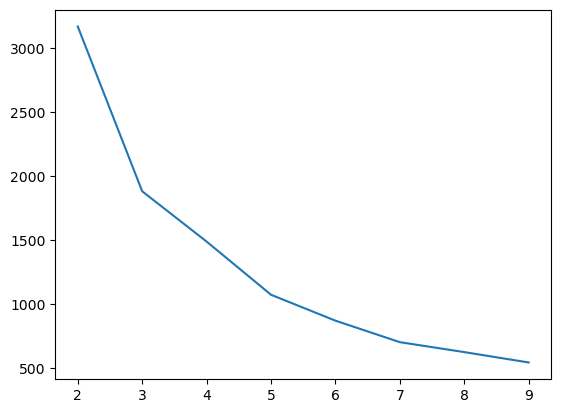

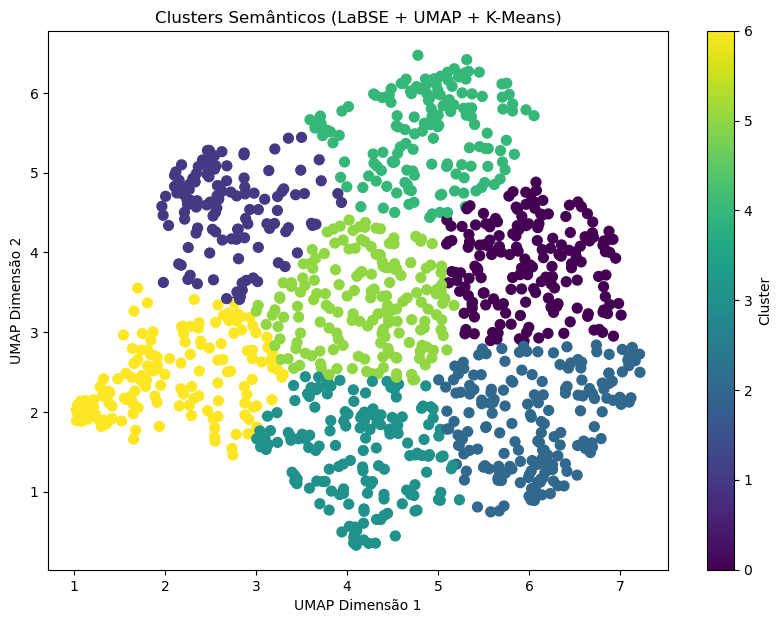

In [4]:
"""cloroquina_pos"""
textos = df_cloroquina_pos["Text"].tolist()
plot_best_k(textos, k_range=range(2, 10))
clusters_resultantes = clusterizar_textos_com_labse(textos, num_clusters=7)

/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


For n_clusters=2, The Silhouette Coefficient is 0.41472283005714417
For n_clusters=3, The Silhouette Coefficient is 0.3973712921142578
For n_clusters=4, The Silhouette Coefficient is 0.3772987723350525
For n_clusters=5, The Silhouette Coefficient is 0.35786619782447815
For n_clusters=6, The Silhouette Coefficient is 0.36868396401405334
For n_clusters=7, The Silhouette Coefficient is 0.3714323937892914
For n_clusters=8, The Silhouette Coefficient is 0.36932867765426636
For n_clusters=9, The Silhouette Coefficient is 0.37097814679145813


/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


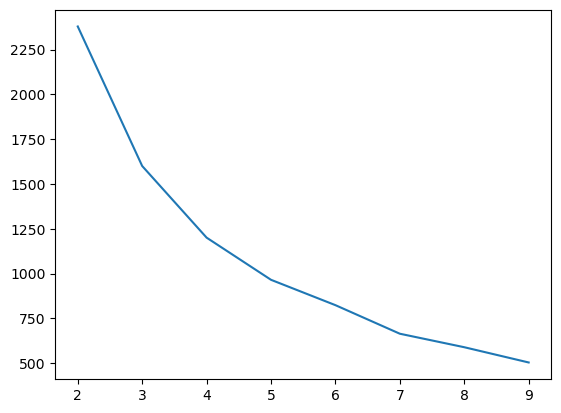

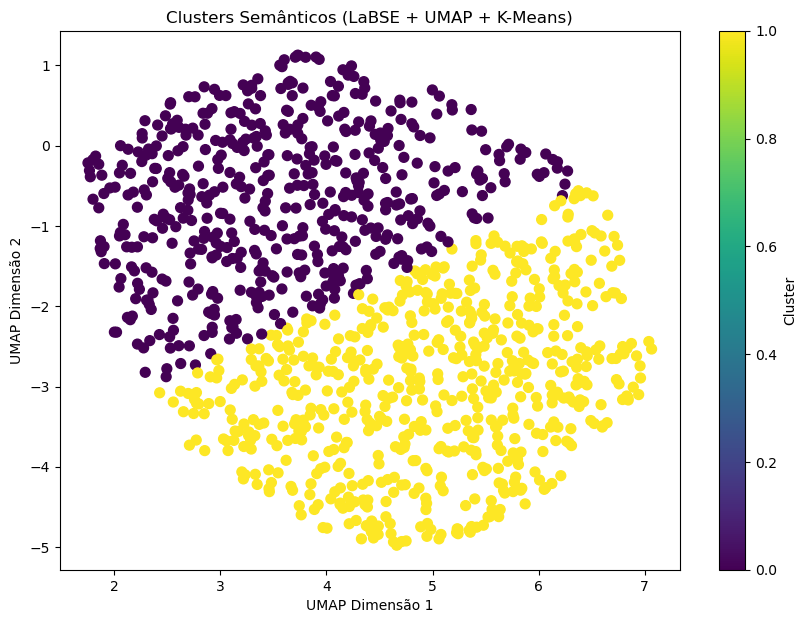

In [9]:
"""cloroquina_neg"""
textos = df_cloroquina_neg["Text"].drop_duplicates().tolist()
plot_best_k(textos, k_range=range(2, 10))
clusters_resultantes = clusterizar_textos_com_labse(textos, num_clusters=2)

/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


For n_clusters=2, The Silhouette Coefficient is 0.3707784414291382
For n_clusters=3, The Silhouette Coefficient is 0.4092649519443512
For n_clusters=4, The Silhouette Coefficient is 0.3835234045982361
For n_clusters=5, The Silhouette Coefficient is 0.35020723938941956
For n_clusters=6, The Silhouette Coefficient is 0.36505043506622314
For n_clusters=7, The Silhouette Coefficient is 0.38839051127433777
For n_clusters=8, The Silhouette Coefficient is 0.3711733818054199
For n_clusters=9, The Silhouette Coefficient is 0.3594290614128113


/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


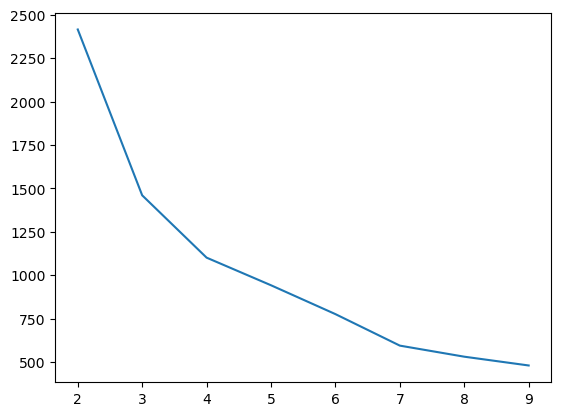

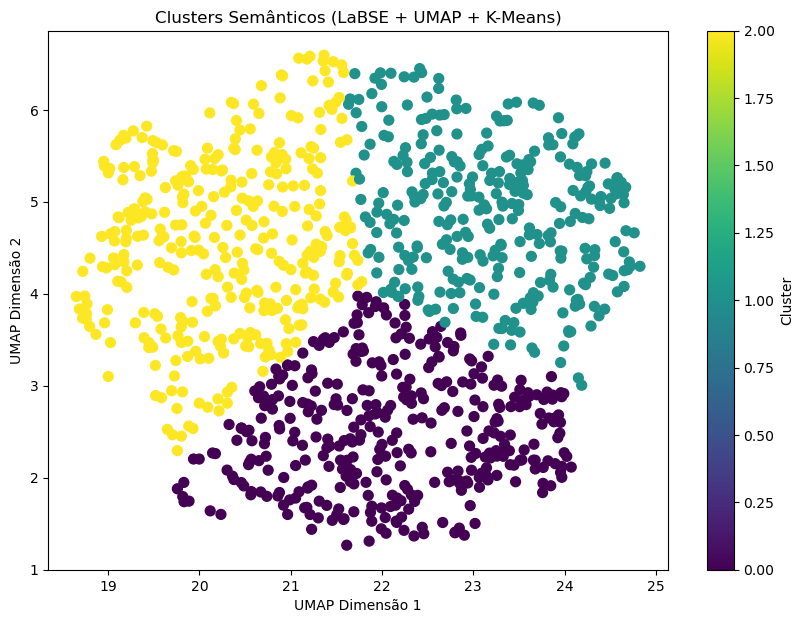

In [10]:
"""igreja_pos"""
textos = df_igreja_pos["Text"].drop_duplicates().tolist()
plot_best_k(textos, k_range=range(2, 10))
clusters_resultantes = clusterizar_textos_com_labse(textos, num_clusters=3)

/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


For n_clusters=2, The Silhouette Coefficient is 0.3453772962093353
For n_clusters=3, The Silhouette Coefficient is 0.38768836855888367
For n_clusters=4, The Silhouette Coefficient is 0.3938959836959839
For n_clusters=5, The Silhouette Coefficient is 0.3609946370124817
For n_clusters=6, The Silhouette Coefficient is 0.3407478332519531
For n_clusters=7, The Silhouette Coefficient is 0.37326565384864807
For n_clusters=8, The Silhouette Coefficient is 0.36064451932907104
For n_clusters=9, The Silhouette Coefficient is 0.3586146831512451


/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


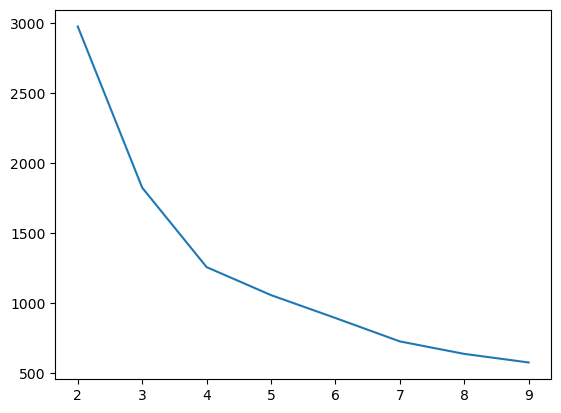

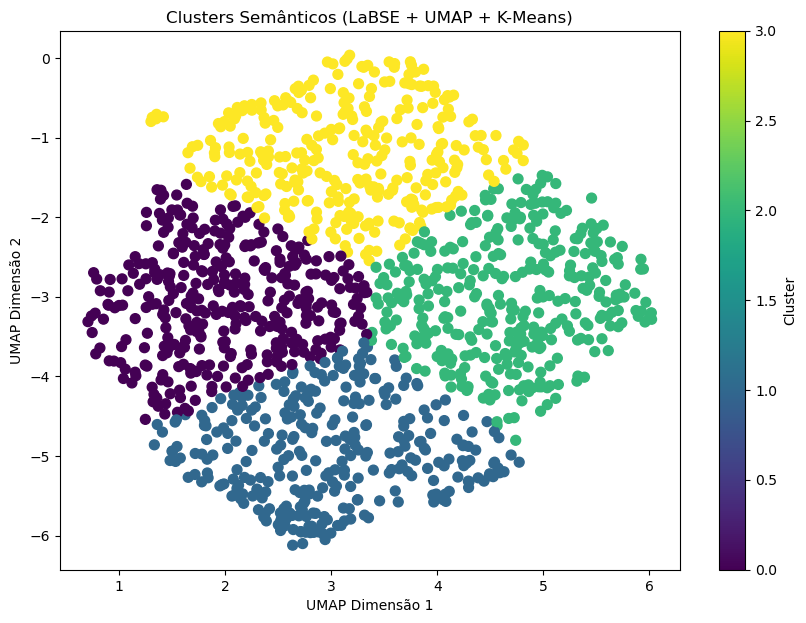

In [6]:
"""igreja_neg"""
textos = df_igreja_neg["Text"].drop_duplicates().tolist()
plot_best_k(textos, k_range=range(2, 10))
clusters_resultantes = clusterizar_textos_com_labse(textos, num_clusters=4)

/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


For n_clusters=2, The Silhouette Coefficient is 0.5090920925140381
For n_clusters=3, The Silhouette Coefficient is 0.44775789976119995
For n_clusters=4, The Silhouette Coefficient is 0.40904343128204346
For n_clusters=5, The Silhouette Coefficient is 0.37991228699684143
For n_clusters=6, The Silhouette Coefficient is 0.39579206705093384
For n_clusters=7, The Silhouette Coefficient is 0.3688936233520508
For n_clusters=8, The Silhouette Coefficient is 0.3636898398399353
For n_clusters=9, The Silhouette Coefficient is 0.3861091136932373


/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


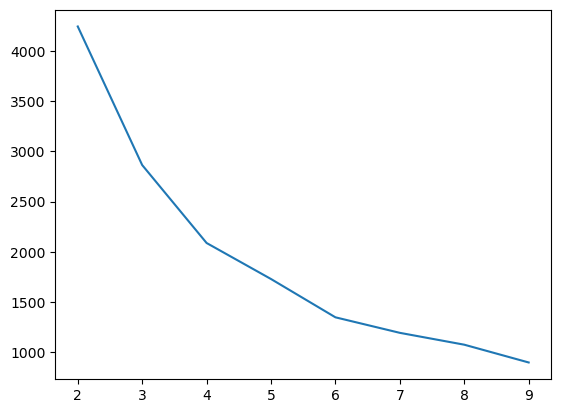

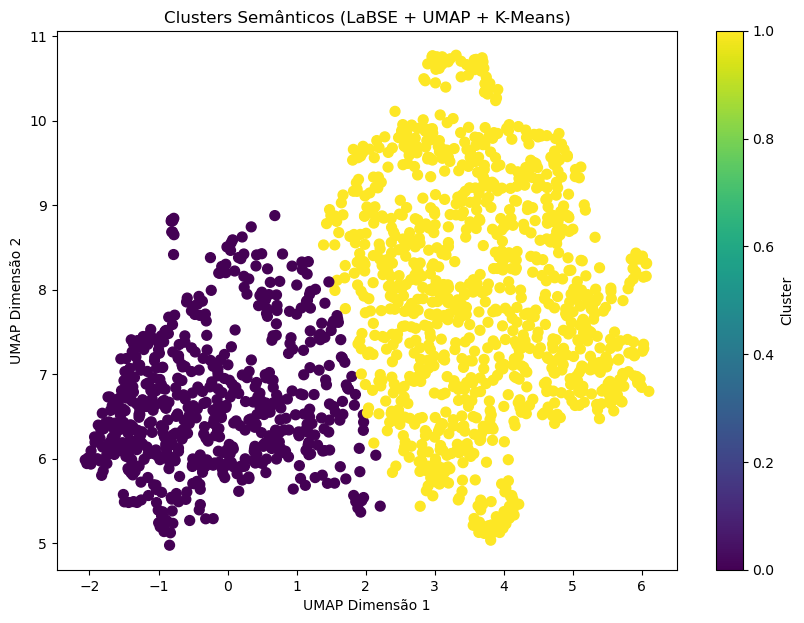

In [8]:
"""cinovac_pos"""
textos = df_cinovac_pos["Text"].drop_duplicates().tolist()
plot_best_k(textos, k_range=range(2, 10))
clusters_resultantes = clusterizar_textos_com_labse(textos, num_clusters=2)

/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


For n_clusters=2, The Silhouette Coefficient is 0.46940499544143677
For n_clusters=3, The Silhouette Coefficient is 0.4239288568496704
For n_clusters=4, The Silhouette Coefficient is 0.42111870646476746
For n_clusters=5, The Silhouette Coefficient is 0.4129640460014343
For n_clusters=6, The Silhouette Coefficient is 0.37798744440078735
For n_clusters=7, The Silhouette Coefficient is 0.37295031547546387
For n_clusters=8, The Silhouette Coefficient is 0.3836396336555481
For n_clusters=9, The Silhouette Coefficient is 0.38382723927497864


/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


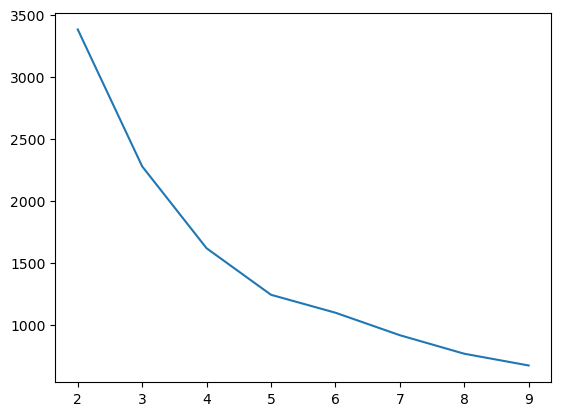

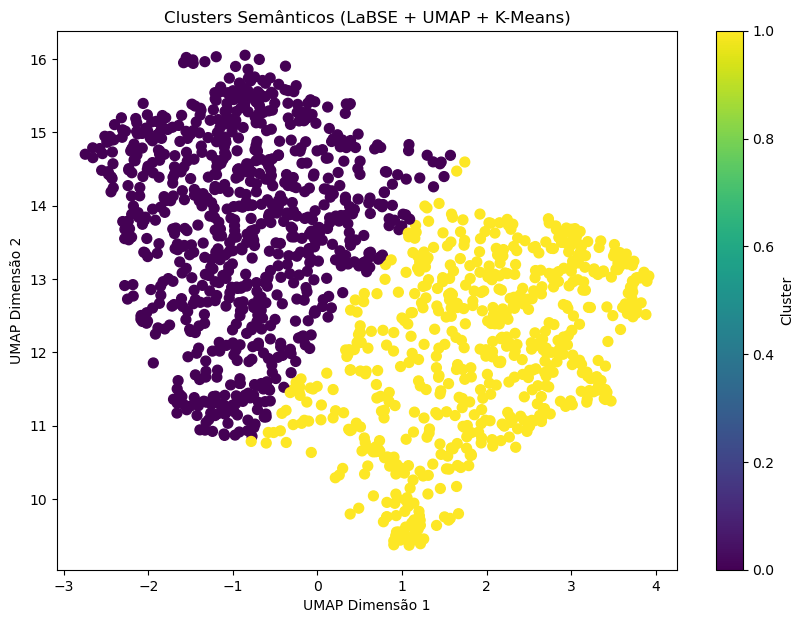

In [10]:
"""cinovac_neg"""
textos = df_cinovac_neg["Text"].drop_duplicates().tolist()
plot_best_k(textos, k_range=range(2, 10))
clusters_resultantes = clusterizar_textos_com_labse(textos, num_clusters=2)

*   **Análise**

In [5]:
import itertools
# Função para encontrar elementos mais próximos ao centróide de cada cluster
def elementos_proximos_centroide(kmeans, X, textos, top_n=3, random_state=42):
    proximos_por_cluster = {}

    for cluster in range(kmeans.n_clusters):
        # Índices dos elementos que pertencem ao cluster atual
        indices_cluster = np.where(kmeans.labels_ == cluster)[0]


        # Vetores dos elementos do cluster atual
        elementos_cluster = X[indices_cluster]

        # Centroide do cluster atual
        centroide = kmeans.cluster_centers_[cluster]

        # Calculando a distância dos elementos ao centroide
        distancias = np.linalg.norm(elementos_cluster - centroide, axis=1)

        # Ordenando os elementos por distância e selecionando os mais próximos
        indices_proximos = indices_cluster[np.argsort(distancias)[:top_n]]
        proximos_por_cluster[cluster] = [textos[i] for i in indices_proximos]

    return proximos_por_cluster


def clusterizar_textos_com_labse(textos, num_clusters=5, random_state=42):
    # 1. Gerar embeddings com LaBSE
    modelo = SentenceTransformer('sentence-transformers/LaBSE')
    embeddings = modelo.encode(textos)

    # 2. Redução de dimensionalidade com t-SNE
    umap_2d = UMAP(n_components=2, init='random', random_state=random_state)
    embeddings_tsne = umap_2d.fit_transform(embeddings)

    # 3. Clusterização com K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(embeddings_tsne)

    return kmeans, embeddings_tsne

top_n = 3

In [6]:
textos_cloro_pos = df_cloroquina_pos["Text"].tolist()

dict_cloro_pos = dict(zip(df_cloroquina_pos["Text"].tolist(), df_cloroquina_pos["User_ID"].tolist()))

kmeans, embeddings = clusterizar_textos_com_labse(textos_cloro_pos, num_clusters=7)

proximos_por_cluster = elementos_proximos_centroide(kmeans, embeddings, textos_cloro_pos, top_n=top_n)




import itertools

textos_origem  = []
textos_alvo    = []
usuario_alvo   = []
usuario_origem = []
clusters       = []

for cluster_n, (cluster, elementos) in enumerate(proximos_por_cluster.items()):
    for i, j in itertools.combinations(elementos, 2):
        textos_origem.append(i)
        textos_alvo.append(j)
        usuario_origem.append(dict_cloro_pos[i])
        usuario_alvo.append(dict_cloro_pos[j])
        clusters.append(cluster_n)


pd.DataFrame({"textos_origem": textos_origem, "textos_alvo": textos_alvo, "usuario_origem": usuario_origem, "usuario_alvo": usuario_alvo, "original_cluster": clusters}).to_csv("cloroquina_pos.csv", index=False, sep=";")


/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [5]:
textos_cloro_neg = df_cloroquina_neg["Text"].tolist()


dict_cloro_neg = dict(zip(df_cloroquina_neg["Text"].tolist(), df_cloroquina_neg["User_ID"].tolist()))

kmeans, embeddings = clusterizar_textos_com_labse(textos_cloro_neg, num_clusters=2)

proximos_por_cluster = elementos_proximos_centroide(kmeans, embeddings, textos_cloro_neg, top_n=top_n)




import itertools

textos_origem  = []
textos_alvo    = []
usuario_alvo   = []
usuario_origem = []
clusters       = []

for cluster_n, (cluster, elementos) in enumerate(proximos_por_cluster.items()):
    for i, j in itertools.combinations(elementos, 2):
        textos_origem.append(i)
        textos_alvo.append(j)
        usuario_origem.append(dict_cloro_neg[i])
        usuario_alvo.append(dict_cloro_neg[j])
        clusters.append(cluster_n)


pd.DataFrame({"textos_origem": textos_origem, "textos_alvo": textos_alvo, "usuario_origem": usuario_origem, "usuario_alvo": usuario_alvo, "original_cluster": clusters}).to_csv("cloroquina_neg.csv", index=False, sep=";")

        

/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [6]:
textos_igreja_pos = df_igreja_pos["Text"].tolist()

dict_igreja_pos = dict(zip(df_igreja_pos["Text"].tolist(), df_igreja_pos["User_ID"].tolist()))

kmeans, embeddings = clusterizar_textos_com_labse(textos_igreja_pos, num_clusters=3)

proximos_por_cluster = elementos_proximos_centroide(kmeans, embeddings, textos_igreja_pos, top_n=top_n)

textos_origem  = []
textos_alvo    = []
usuario_alvo   = []
usuario_origem = []
clusters       = []

for cluster_n, (cluster, elementos) in enumerate(proximos_por_cluster.items()):
    for i, j in itertools.combinations(elementos, 2):
        textos_origem.append(i)
        textos_alvo.append(j)
        usuario_origem.append(dict_igreja_pos[i])
        usuario_alvo.append(dict_igreja_pos[j])
        clusters.append(cluster_n)

pd.DataFrame({"textos_origem": textos_origem, "textos_alvo": textos_alvo, "usuario_origem": usuario_origem, "usuario_alvo": usuario_alvo, "original_cluster": clusters}).to_csv("igreja_pos.csv", index=False, sep=";")



/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [7]:
textos_igreja_neg = df_igreja_neg["Text"].tolist()

dict_igreja_neg = dict(zip(df_igreja_neg["Text"].tolist(), df_igreja_neg["User_ID"].tolist()))

kmeans, embeddings = clusterizar_textos_com_labse(textos_igreja_neg, num_clusters=4)

proximos_por_cluster = elementos_proximos_centroide(kmeans, embeddings, textos_igreja_neg, top_n=top_n)

textos_origem  = []
textos_alvo    = []
usuario_alvo   = []
usuario_origem = []
clusters       = []

for cluster_n, (cluster, elementos) in enumerate(proximos_por_cluster.items()):
    for i, j in itertools.combinations(elementos, 2):
        textos_origem.append(i)
        textos_alvo.append(j)
        usuario_origem.append(dict_igreja_neg[i])
        usuario_alvo.append(dict_igreja_neg[j])
        clusters.append(cluster_n)

pd.DataFrame({"textos_origem": textos_origem, "textos_alvo": textos_alvo, "usuario_origem": usuario_origem, "usuario_alvo": usuario_alvo, "original_cluster": clusters}).to_csv("igreja_neg.csv", index=False, sep=";")


/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [8]:
textos_cinovac_pos = df_cinovac_pos["Text"].tolist()

dict_cinovac_pos = dict(zip(df_cinovac_pos["Text"].tolist(), df_cinovac_pos["User_ID"].tolist()))

kmeans, embeddings = clusterizar_textos_com_labse(textos_cinovac_pos, num_clusters=2)

proximos_por_cluster = elementos_proximos_centroide(kmeans, embeddings, textos_cinovac_pos, top_n=top_n)

textos_origem  = []
textos_alvo    = []
usuario_alvo   = []
usuario_origem = []
clusters       = []

for cluster_n, (cluster, elementos) in enumerate(proximos_por_cluster.items()):
    for i, j in itertools.combinations(elementos, 2):
        textos_origem.append(i)
        textos_alvo.append(j)
        usuario_origem.append(dict_cinovac_pos[i])
        usuario_alvo.append(dict_cinovac_pos[j])
        clusters.append(cluster_n)

pd.DataFrame({"textos_origem": textos_origem, "textos_alvo": textos_alvo, "usuario_origem": usuario_origem, "usuario_alvo": usuario_alvo, "original_cluster": clusters}).to_csv("cinovac_pos.csv", index=False, sep=";")

/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [9]:
textos_cinovac_neg = df_cinovac_neg["Text"].tolist()

dict_cinovac_neg = dict(zip(df_cinovac_neg["Text"].tolist(), df_cinovac_neg["User_ID"].tolist()))

kmeans, embeddings = clusterizar_textos_com_labse(textos_cinovac_neg, num_clusters=2)

proximos_por_cluster = elementos_proximos_centroide(kmeans, embeddings, textos_cinovac_neg, top_n=top_n)

textos_origem  = []
textos_alvo    = []
usuario_alvo   = []
usuario_origem = []
clusters       = []

for cluster_n, (cluster, elementos) in enumerate(proximos_por_cluster.items()):
    for i, j in itertools.combinations(elementos, 2):
        textos_origem.append(i)
        textos_alvo.append(j)
        usuario_origem.append(dict_cinovac_neg[i])
        usuario_alvo.append(dict_cinovac_neg[j])
        clusters.append(cluster_n)

pd.DataFrame({"textos_origem": textos_origem, "textos_alvo": textos_alvo, "usuario_origem": usuario_origem, "usuario_alvo": usuario_alvo, "original_cluster": clusters}).to_csv("cinovac_neg.csv", index=False, sep=";")

/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablo/miniconda3/envs/unsloth/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
